### THIS CODE TESTS GEMINI API CONNECTION

In [1]:
import google.generativeai as genai
import os
from dotenv import load_dotenv

# Configure the API key
genai.configure(api_key=os.environ.get('GOOGLE_API_KEY'))

# Initialize the generative model
model = genai.GenerativeModel(model_name="gemini-1.5-flash-latest")

# Generate content
response = model.generate_content("Explain how AI works in a few words")
print(response.text)

/workspaces/RAG-chatbot/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
E0000 00:00:1758043373.146767   33312 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


Finding patterns in data to make predictions.



### This code visualizes the given data using matplotlib and seaborn

In [2]:
def generate_code(user_input):
    prompt = f"""
Generate an executable Python script for the given query: {user_input} that:

- Imports pandas, seaborn, and matplotlib.pyplot.
- Loads the data into a pandas DataFrame.
- Creates a bar chart visualizing the data using seaborn.
- Adds axis labels and a descriptive title.
- Returns only the code, no explanations.

Example:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = [
    {{"category": "Electronics", "total_sales": 120000}},
    {{"category": "Clothing", "total_sales": 90000}},
    {{"category": "Books", "total_sales": 45000}}
]

df = pd.DataFrame(data)

sns.barplot(data=df, x="category", y="total_sales")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.title("Total Sales by Category")
plt.show()
"""

    # Initialize the generative model
    model = genai.GenerativeModel(model_name="gemini-1.5-flash-latest")

    # Generate content with the prompt
    response = model.generate_content(prompt)

    print(response.text)
    return response.text


In [3]:
user_input = input('Enter your prompt')
response = generate_code(user_input)

```python
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'Make': ['Toyota', 'Honda', 'Ford', 'Chevrolet', 'Nissan'],
    'Sales': [15000, 12000, 10000, 9000, 8000]
}

df = pd.DataFrame(data)

sns.barplot(data=df, x='Make', y='Sales')
plt.xlabel('Car Make')
plt.ylabel('Number of Sales')
plt.title('Car Sales by Make')
plt.show()
```



In [4]:
import re

def extract_python_code(full_text: str) -> str:
    """
    Extracts the first Python code block (inside ```python ... ```) from the given text.
    Returns the code as a string without the triple backticks.
    If no Python code block found, returns an empty string.
    """
    pattern = r"```python\s*(.*?)```"
    match = re.search(pattern, full_text, re.DOTALL | re.IGNORECASE)
    if match:
        code = match.group(1).strip()
        return code
    return ""

In [6]:
clean = extract_python_code(response)
print(clean)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'Make': ['Toyota', 'Honda', 'Ford', 'Chevrolet', 'Nissan'],
    'Sales': [15000, 12000, 10000, 9000, 8000]
}

df = pd.DataFrame(data)

sns.barplot(data=df, x='Make', y='Sales')
plt.xlabel('Car Make')
plt.ylabel('Number of Sales')
plt.title('Car Sales by Make')
plt.show()


In [7]:
def run_python_code(code_str: str):
    """
    Executes the given Python code string in a controlled environment.

    Args:
        code_str (str): The Python code to execute.

    Returns:
        None
    """
    try:
        # Create a separate local namespace to avoid polluting globals
        local_namespace = {}
        exec(code_str, {}, local_namespace)
    except Exception as e:
        print(f"Error executing code: {e}")

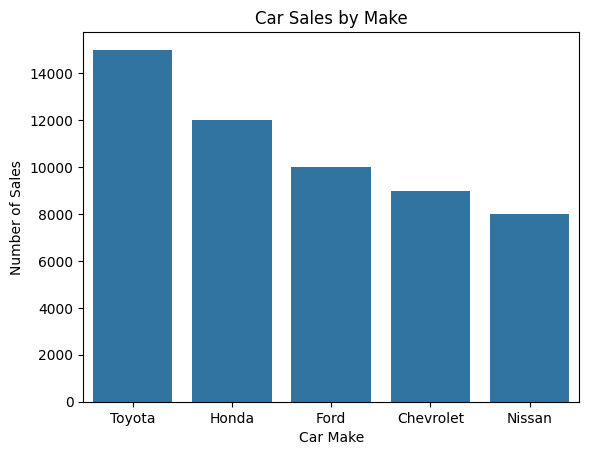

In [9]:
run_python_code(clean)

### Combined code

E0000 00:00:1758048490.443459   33312 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


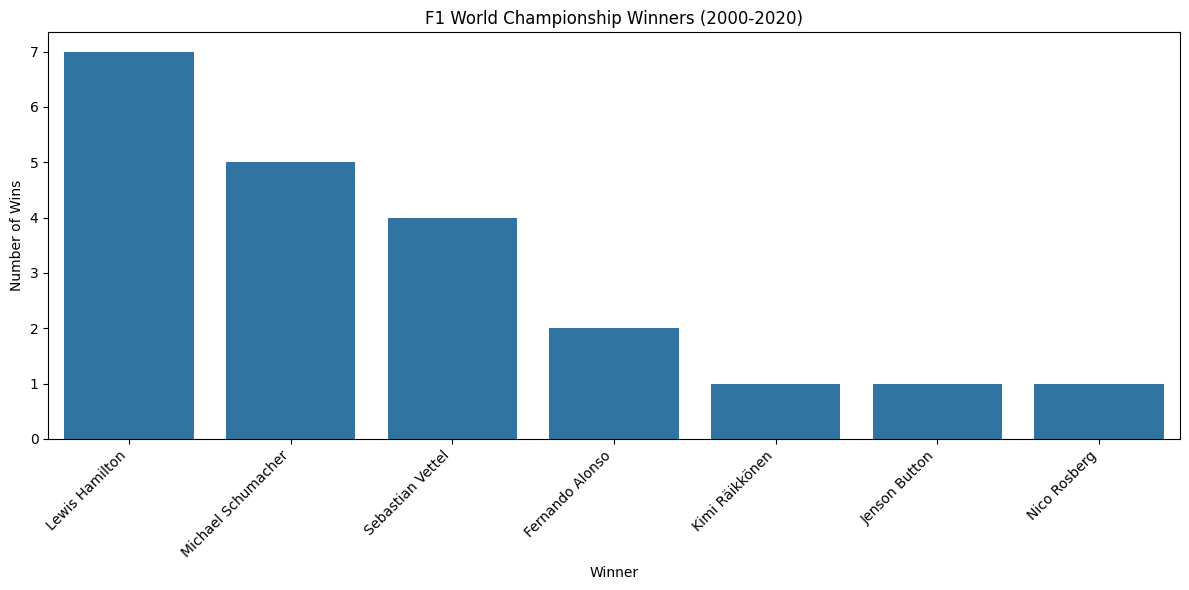

In [ ]:
import google.generativeai as genai
import os
from dotenv import load_dotenv
import re
load_dotenv()
genai.configure(api_key=os.environ.get('GOOGLE_API_KEY'))

def generate_visualization(user_input):
    prompt = f"""
Generate an executable Python script for the given query: {user_input} that:

- Imports pandas, seaborn, and matplotlib.pyplot.
- Loads the data into a pandas DataFrame.
- Creates a bar chart visualizing the data using seaborn.
- Adds axis labels and a descriptive title.
- Returns only the code, no explanations.

Example:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = [
    {{"category": "Electronics", "total_sales": 120000}},
    {{"category": "Clothing", "total_sales": 90000}},
    {{"category": "Books", "total_sales": 45000}}
]

df = pd.DataFrame(data)

sns.barplot(data=df, x="category", y="total_sales")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.title("Total Sales by Category")
plt.show()
"""

    # Initialize the generative model
    model = genai.GenerativeModel(model_name="gemini-1.5-flash-latest")

    # Generate content with the prompt
    response = model.generate_content(prompt)

    def extract_python_code(full_text: str) -> str:
        """
        Extracts the first Python code block (inside ```python ... ```) from the given text.
        Returns the code as a string without the triple backticks.
        If no Python code block found, returns an empty string.
        """
        pattern = r"```python\s*(.*?)```"
        match = re.search(pattern, full_text, re.DOTALL | re.IGNORECASE)
        if match:
            code = match.group(1).strip()
            return code
        return ""
    
    import re
    import datetime

    def replace_plt_show(code_string):
        pattern = r"plt\.show\s*\(\)"
        
        # Generate a unique timestamp
        timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
        
        # Create the replacement string with the unique timestamp
        replacement = f"plt.savefig('{timestamp}.png')"
        
        # Use re.sub to find and replace all matches
        modified_code = re.sub(pattern, replacement, code_string)
        
        return modified_code,timestamp

    def run_python_code(code_str: str):
        """
        Executes the given Python code string in a controlled environment.

        Args:
            code_str (str): The Python code to execute.

        Returns:
            None
        """
        try:
            # Create a separate local namespace to avoid polluting globals
            local_namespace = {}
            exec(code_str, {}, local_namespace)
        except Exception as e:
            print(f"Error executing code: {e}")
    

    
    clean = extract_python_code(response.text)
    clean_code,timestamp = replace_plt_show(clean)
    run_python_code(clean_code)

    return f"Visualization saved as {timestamp}.png"


user_input = input('Enter your prompt')
response = generate_visualization(user_input)
print(response)


In [29]:
print(response)

Visualization saved as 20250916_184813.png
